<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import itertools
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.core.pylabtools import figsize
warnings.filterwarnings("ignore")
%matplotlib inline
!sudo pip3 install keras

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.layers import LocallyConnected2D
from tensorflow.keras.layers import LocallyConnected1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
print(tf.__version__)
from matplotlib import pyplot as plt
from random import randint

2.8.0


##Predicción de sobrecarga en grupos de líneas de transmisión.
En esta sección se usará inferencia bayesiana para ajustar un modelo de regresión logística a datos de violación de flujo de potencia eléctrica en grupos de líneas de transmisión, que interconectan regiones eléctricas. La variable dependientes es de naturaleza binaria con un valor de uno si la línea presenta sobrecarga y cero si no. Las variables independientes son el flujo neto máximo y mínimo en la región eléctrica en un día y se calcula como la diferencia entre la demanda menos la generación en cada región.

In [3]:
df = pd.read_csv('overload.csv')
df = df.assign(const=1)
#print(df)
dfy = df[['L3','L5','L6','L7','L14','L15','L22','L31','L38','L39','L51','L58','L65']] #Se escoge le número de línea de transmisión
dfx = df[['CEN','NES','NOR','NTE','OCC','ORI','PEN','CEN_min','NES_min','NOR_min','NTE_min','OCC_min','ORI_min','PEN_min']] ## Predictors
#df.sample(5)
#df.describe()

A continuación se enlista las configuraciones de red usadas en el libro (para resolver el problema *11.7 Example: ZIP Code Data*). 
*   Net-1: Sin capa oculta, equivalente a regresión logística multinomial.
*   Net-2: Una capa oculta, 12 unidades ocultas totalmente conectadas.
*   Net-3: Dos capas ocultas conectadas localmente.
*   Net-4: Dos capas ocultas, conectadas localmente con peso compartido.
*   Net-5: dos capas ocultas, conectadas localmente, dos niveles de peso compartido.

Trataremos de replicar el ejercicio aplicando a nuestros datos. A diferencia del problema de 2dimensiones del libro , usaremos redes para una sola dimensión para predecir un vector de Binarios (Sobrecarga o no de algunas líneas de tranmisión) a partir de un vector de datos reales (datos de demanda de las regiones eléctricas). También mencionan que todas las redes tienen unidades de salida sigmoidales y el ajuste es con mínimpos cuadrados.


Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 5,770
Trainable params: 5,770
Non-trainable params: 0
_________________________________________________________________


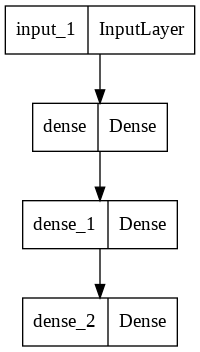

In [4]:
#model = Sequential()
#num_classes = 14
#model.add(Dense(units=num_classes, activation='sigmoid', input_shape=(dfx,)))
#model.summary()
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(14,))
inputs.shape
inputs.dtype

dense = layers.Dense(64, activation="relu")
x = dense(inputs)

x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

model.summary()

keras.utils.plot_model(model, "my_first_model.png")

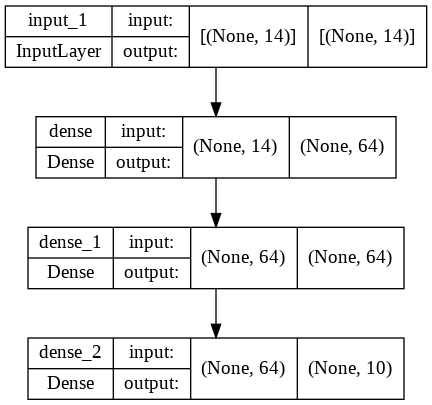

In [5]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

### **Conclusión:** 
Hemos utilizado **Keras** para implementar diferentes estructuras de redes neuronales para predicción de sobrecarga en líneas de transmisión de acuerdo a la demanda en las regiones.

Los resultadosindica que la mejor estructura es........... sin embargo, el ............ algunas ventajas ya que da la posibilidad de ................, mientrass.

Otra cosa que observamos es que .............., los rendimientos de predicción son similares. Esto quiere decir que a medida que crece el conjunto de datos los resultados deberían converger en la misma solución.

[The Functional API TUTORIAL](https://keras.io/guides/functional_api/)

[https://gist.github.com/jkleint/1d878d0401b28b281eb75016ed29f2ee](https://gist.github.com/jkleint/1d878d0401b28b281eb75016ed29f2ee)

[Introduction to 1D Convolutional Neural Networks in Keras for Time Sequences](https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf)

[1D Convolutional Neural Network Models for Human Activity Recognition](https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/)